## Contexte & Chargement initial

Ce notebook vise à explorer et structurer les données d’accidents/incidents ferroviaires aux USA pour isoler un module "risque ferroviaire" exploitable dans une analyse globale de résilience logistique.

| Variable                       | Description courte                                                          | Type           | Exemples                                         |
|--------------------------------|----------------------------------------------------------------------------|----------------|--------------------------------------------------|
| Accident_Number                | Identifiant unique de l’accident                                           | object         | 'N1700013', '201707188', '0420001'               |
| Reporting_Railroad_Code        | Code société ferroviaire déclarante                                        | object         | 'NICD', 'NIRC', 'CR', 'IC', 'NS', 'UP'           |
| Reporting_Railroad_Name        | Nom société ferroviaire déclarante                                         | object         | 'Northern Indiana Commuter Transportation District' |
| Accident_Year                  | Année de l’accident                                                        | int64          | 2017, 1981                                       |
| Accident_Month                 | Mois de l’accident                                                         | int64          | 6, 4, 10, 12                                     |
| Day                            | Jour du mois                                                               | int64          | 6, 11, 7, 15                                     |
| Date                           | Date complète (mm/dd/yyyy)                                                 | object (date)  | '06/06/2017', '01/11/2007'                       |
| Time                           | Heure de l’accident                                                        | object         | '2:14 PM', '7:20 AM', '3:55 AM'                  |
| Accident_Type                  | Type d’accident                                                            | object         | 'Derailment', 'Side collision', 'Obstruction'    |
| State_Abbreviation             | Code état USA                                                              | object         | 'IL', 'LA', 'NY'                                 |
| State_Name                     | Nom de l’état                                                              | object         | 'ILLINOIS', 'LOUISIANA', 'NEW YORK'              |
| County_Name                    | Nom du comté                                                               | object         | 'COOK', 'KANKAKEE', 'ST JOHN THE BAPTIST'        |
| Latitude                       | Latitude de l’événement                                                    | float64        | 41.884034, 41.054254, 41.267569                  |
| Longitude                      | Longitude de l’événement                                                   | float64        | -87.623002, -87.906205, -88.207738               |
| Weather_Condition              | Conditions météo au moment de l’accident                                   | object         | 'Clear', 'Snow', 'Cloudy', 'Rain'                |
| Temperature                    | Température au moment de l’accident (°F)                                   | float64        | 65, 28, 56, 60                                   |
| Visibility                     | Conditions de visibilité                                                   | object         | 'Day', 'Dawn', 'Dark'                            |
| Total_Damage_Cost              | Coût total des dégâts (USD)                                                | float64        | 132013, 9986, 148289                             |
| Equipment_Damage_Cost          | Dégâts matériels sur le matériel roulant                                   | float64        | 98627, 5220, 7418, 15061                         |
| Track_Damage_Cost              | Dégâts sur l’infrastructure (rails)                                        | float64        | 0, 4766, 140871, 0                               |
| Primary_Accident_Cause         | Cause principale (libellé)                                                 | object         | 'Switch point worn or broken', 'Highway user deliberately disregarded crossing warning devices' |
| Primary_Accident_Cause_Code    | Code de la cause principale                                                | object         | 'T314', 'M308', 'H306', 'M404'                   |
| Accident_Cause                 | Cause d’accident (secondaire ou globale, libellé)                          | object         | 'Switch point worn or broken', 'Highway user deliberately disregarded crossing warning devices' |
| Accident_Cause_Code            | Code cause d’accident                                                      | object         | 'T314', 'M308', 'H306', 'M404'                   |
| Railroad_Employees_Killed      | Nombre d’employés tués                                                     | int64          | 0, 1                                             |
| Railroad_Employees_Injured     | Nombre d’employés blessés                                                  | int64          | 0, 5, 2                                          |
| Passengers_Killed              | Nombre de passagers tués                                                   | int64          | 0                                                |
| Passengers_Injured             | Nombre de passagers blessés                                                | int64          | 0, 14, 34                                        |
| Others_Killed                  | Nombre de tiers tués                                                       | int64          | 0, 3                                             |
| Others_Injured                 | Nombre de tiers blessés                                                    | int64          | 0, 1, 2                                          |
| Total_Persons_Killed           | Total tués (toutes catégories)                                             | int64          | 0, 3, 1                                          |
| Total_Persons_Injured          | Total blessés (toutes catégories)                                          | int64          | 0, 5, 34                                         |
| Hazmat_Cars                    | Nombre de wagons matières dangereuses présents                             | int64          | 0, 7                                             |
| Hazmat_Cars_Damaged            | Nombre de wagons matières dangereuses endommagés                           | int64          | 0, 1                                             |
| Hazmat_Released_Cars           | Nombre de wagons matières dangereuses avec fuite                           | int64          | 0                                                |
| Persons_Evacuated              | Nombre de personnes évacuées                                               | int64          | 0, 149                                           |
| Derailed_Loaded_Freight_Cars   | Nombre de wagons marchandises chargés déraillés                            | int64          | 0, 5                                             |
| Derailed_Empty_Freight_Cars    | Nombre de wagons marchandises vides déraillés                              | int64          | 0, 3                                             |
| Derailed_Loaded_Passenger_Cars | Nombre de voitures voyageurs chargées déraillées                           | int64          | 0                                                |
| Derailed_Empty_Passenger_Cars  | Nombre de voitures voyageurs vides déraillées                              | int64          | 0                                                |

In [39]:
# Imports principaux 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
from sklearn.preprocessing import MinMaxScaler

# Affichage lisible
pd.set_option('display.max_columns', None)

# Chemin du fichier
DATA_PATH = '../data/extracted/Railroad_Accident_Incident_Data/Rail_Equipment_Accident_Incident_Data.csv'

In [40]:
# Chargement du dataset
df = pd.read_csv(DATA_PATH)

# Shape du dataset
print(f"Shape du dataset : {df.shape}")

# Liste des colonnes
print("\nColonnes du dataset :")
print(df.columns.tolist())

# Aperçu des 3 premières lignes
display(df.head(3))

C:\Users\gouad\AppData\Local\Temp\ipykernel_65316\3359918831.py:2: DtypeWarning: Columns (26,27,43,46,47,48,50,59,61,62,63,64,65,66,67,68,69,71,129,130,131,136) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(DATA_PATH)


Shape du dataset : (215849, 160)

Colonnes du dataset :
['Reporting Railroad Code', 'Reporting Railroad Name', 'Report Year', 'Accident Number', 'PDF Link', 'Accident Year', 'Accident Month', 'Other Railroad Code', 'Other Railroad Name', 'Other Accident Number', 'Other Accident Year', 'Other Accident Month', 'Maintenance Railroad Code', 'Maintenance Railroad Name', 'Maintenance Accident Number', 'Maintenance Accident Year', 'Maintenance Accident Month', 'Grade Crossing ID', 'Day', 'Date', 'Time', 'Accident Type Code', 'Accident Type', 'Hazmat Cars', 'Hazmat Cars Damaged', 'Hazmat Released Cars', 'Persons Evacuated', 'Subdivision', 'Division Code', 'Division', 'Station', 'Milepost', 'State Code', 'State Abbreviation', 'State Name', 'County Code', 'County Name', 'District', 'Temperature', 'Visibility Code', 'Visibility', 'Weather Condition Code', 'Weather Condition', 'Track Type Code', 'Track Type', 'Track Name', 'Track Class', 'Track Density', 'Train Direction Code', 'Train Direction', 

,Reporting Railroad Code,Reporting Railroad Name,Report Year,Accident Number,PDF Link,Accident Year,Accident Month,Other Railroad Code,Other Railroad Name,Other Accident Number,Other Accident Year,Other Accident Month,Maintenance Railroad Code,Maintenance Railroad Name,Maintenance Accident Number,Maintenance Accident Year,Maintenance Accident Month,Grade Crossing ID,Day,Date,Time,Accident Type Code,Accident Type,Hazmat Cars,Hazmat Cars Damaged,Hazmat Released Cars,Persons Evacuated,Subdivision,Division Code,Division,Station,Milepost,State Code,State Abbreviation,State Name,County Code,County Name,District,Temperature,Visibility Code,Visibility,Weather Condition Code,Weather Condition,Track Type Code,Track Type,Track Name,Track Class,Track Density,Train Direction Code,Train Direction,Equipment Type Code,Equipment Type,Equipment Attended,Train Number,Train Speed,Recorded Estimated Speed,Maximum Speed,Gross Tonnage,Signalization Code,Signalization,Method of Operation Code,Method of Operation,Adjunct Code 1,Adjunct Code Name 1,Adjunct Code 2,Adjunct Code Name 2,Adjunct Code 3,Adjunct Code Name 3,Remote Control Locomotive Code,Remote Control Locomotive,First Car Initials,First Car Number,First Car Position,First Car Loaded,Causing Car Initials,Causing Car Number,Causing Car Position,Causing Car Loaded,Positive Alcohol Tests,Positive Drug Tests,Passengers Transported,Head End Locomotives,Mid Train Manual Locomotives,Mid Train Remote Locomotives,Rear End Manual Locomotives,Rear End Remote Locomotives,Derailed Head End Locomotives,Derailed Mid Train Manual Locomotives,Derailed Mid Train Remote Locomotives,Derailed Rear End Manual Locomotives,Derailed Rear End Remote Locomotives,Loaded Freight Cars,Loaded Passenger Cars,Empty Freight Cars,Empty Passenger Cars,Cabooses,Derailed Loaded Freight Cars,Derailed Loaded Passenger Cars,Derailed Empty Freight Cars,Derailed Empty Passenger Cars,Derailed Cabooses,Equipment Damage Cost,Track Damage Cost,Total Damage Cost,Primary Accident Cause Code,Primary Accident Cause,Contributing Accident Cause Code,Contributing Accident Cause,Accident Cause Code,Accident Cause,Engineers On Duty,Firemen On Duty,Conductors On Duty,Brakemen On Duty,Hours Engineers On Duty,Minutes Engineers On Duty,Hours Conductors On Duty,Minutes Conductors On Duty,Railroad Employees Killed,Railroad Employees Injured,Passengers Killed,Passengers Injured,Others Killed,Others Injured,Persons Killed For Reporting Railroad,Persons Injured For Reporting Railroad,Total Persons Killed,Total Persons Injured,Total Killed Form 54,Total Injured Form 54,Special Study 1,Special Study 2,Latitude,Longitude,Narrative,Joint Track Type,Joint Track Class,Class Code,Class,Joint CD,Incident Key,Report Key,Reporting Railroad Company Grouping,Reporting Railroad Class,Reporting Railroad SMT Grouping,Reporting Parent Railroad Company Code,Reporting Parent Railroad Company Name,Reporting Railroad Holding Company,Other Railroad Company Grouping,Other Railroad Class,Other Railroad SMT Grouping,Other Parent Railroad Company Code,Other Parent Railroad Company Name,Other Railroad Holding Company,Maintenance Railroad Company Grouping,Maintenance Railroad Class,Maintenance Railroad SMT Grouping,Maintenance Parent Railroad Company Code,Maintenance Parent Railroad Company Name,Maintenance Railroad Holding Company
0,NICD,Northern Indiana Commuter Transportation District,2017.0,N1700013,https://safetydata.fra.dot.gov/Officeofsafety/...,17.0,6.0,NaN,NaN,NaN,NaN,NaN,NIRC,NORTHEAST ILLINOIS REGIONAL COMMUTER RAIL CORP...,201707188,17.0,6.0,NaN,6.0,06/06/2017,2:14 PM,1.0,Derailment,0.0,0.0,0.0,149,SYSTEM,NaN,NaN,CHICAGO,.55,17.0,IL,ILLINOIS,31.0,COOK,4.0,65.0,2.0,Day,1.0,Clear,2.0,Yard,YARD LEAD,1,NaN,1.0,North,3,Commuter Train - Pulling,Yes,918,10.0,Estimated,10,0,2.0,Not Signaled,NaN,Other Than Main Track,NaN,NaN,NaN,NaN,NaN,NaN,0.0,Not a remotely controlled operation,NICD,000203,2.0,No,NaN,NaN,0.0,NaN,0.0,0.0,Yes,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.

## Types, valeurs manquantes et sélection des variables clés

Objectif :
- Cartographier les types et les taux de valeurs manquantes pour toutes les colonnes.
- Préparer une shortlist robuste des variables à extraire pour le module “risque ferroviaire”.
- Repérer d’éventuelles colonnes à écarter (trop vides/inutiles), mais sans perdre les infos critiques pour la future analyse dashboard.

In [41]:
# 1. Affichage synthétique des types et valeurs manquantes (trié décroissant)
types_na = pd.DataFrame({
    "Type": df.dtypes,
    "Nb_NA": df.isna().sum(),
    "Pourc_NA": (df.isna().mean() * 100).round(2)
}).sort_values("Pourc_NA", ascending=False)

display(types_na.head(25))  # Top 25 colonnes les plus vides
display(types_na.tail(15))  # 15 colonnes les plus remplies

# 2. Affichage des colonnes qui dépassent un seuil critique de valeurs manquantes (exemple 95%)
seuil_na = 95
cols_drop = types_na[types_na["Pourc_NA"] > seuil_na].index.tolist()
print(f"\nColonnes avec >{seuil_na}% de NaN ({len(cols_drop)}):\n{cols_drop}")

# 3. Shortlist des variables prioritaires à garder (adaptée pour dashboard risque)
variables_prio = [
    # Structure/identité
    "Accident Number", "Reporting Railroad Code", "Reporting Railroad Name",
    "Accident Year", "Accident Month", "Day", "Date", "Time", "Report Year",
    # Nature et contexte
    "Accident Type", "State Abbreviation", "State Name", "County Name", "Latitude", "Longitude",
    "Weather Condition", "Temperature", "Visibility", "Train Speed",
    # Impact/coût
    "Total Damage Cost", "Equipment Damage Cost", "Track Damage Cost",
    # Causes
    "Primary Accident Cause", "Primary Accident Cause Code",
    "Accident Cause", "Accident Cause Code",
    # Humain
    "Railroad Employees Killed", "Railroad Employees Injured",
    "Passengers Killed", "Passengers Injured",
    "Others Killed", "Others Injured", "Total Persons Killed", "Total Persons Injured",
    # Risque/impact logistique
    "Hazmat Cars", "Hazmat Cars Damaged", "Hazmat Released Cars", "Persons Evacuated",
    "Derailed Loaded Freight Cars", "Derailed Empty Freight Cars",
    "Derailed Loaded Passenger Cars", "Derailed Empty Passenger Cars"
]

# Si certaines colonnes shortlistées sont absentes (orthographe, warning typique), on les liste :
missing = [v for v in variables_prio if v not in df.columns]
if missing:
    print("\nVariables shortlistées absentes dans le DataFrame :", missing)

print("\nVariables shortlistées pour la suite (pour dashboard) :")
print([v for v in variables_prio if v in df.columns])

,Type,Nb_NA,Pourc_NA
Adjunct Code Name 3,object,215254,99.72
Adjunct Code 3,object,215254,99.72
Adjunct Code Name 2,object,213720,99.01
Adjunct Code 2,object,213720,99.01
Other Railroad Company Grouping,object,210751,97.64
Grade Crossing ID,object,204706,94.84
Special Study 2,object,201510,93.36
Other Railroad SMT Grouping,object,199924,92.62
Other Railroad Class,object,199598,92.47
Other Railroad Name,object,197137,91.33


,Type,Nb_NA,Pourc_NA
Derailed Loaded Freight Cars,float64,1,0.0
Track Damage Cost,object,1,0.0
Total Damage Cost,object,1,0.0
Others Injured,float64,1,0.0
Others Killed,float64,1,0.0
Passengers Injured,float64,1,0.0
Total Injured Form 54,object,1,0.0
Incident Key,object,1,0.0
Report Key,object,1,0.0
Joint CD,float64,1,0.0



Colonnes avec >95% de NaN (5):
['Adjunct Code Name 3', 'Adjunct Code 3', 'Adjunct Code Name 2', 'Adjunct Code 2', 'Other Railroad Company Grouping']

Variables shortlistées pour la suite (pour dashboard) :
['Accident Number', 'Reporting Railroad Code', 'Reporting Railroad Name', 'Accident Year', 'Accident Month', 'Day', 'Date', 'Time', 'Report Year', 'Accident Type', 'State Abbreviation', 'State Name', 'County Name', 'Latitude', 'Longitude', 'Weather Condition', 'Temperature', 'Visibility', 'Train Speed', 'Total Damage Cost', 'Equipment Damage Cost', 'Track Damage Cost', 'Primary Accident Cause', 'Primary Accident Cause Code', 'Accident Cause', 'Accident Cause Code', 'Railroad Employees Killed', 'Railroad Employees Injured', 'Passengers Killed', 'Passengers Injured', 'Others Killed', 'Others Injured', 'Total Persons Killed', 'Total Persons Injured', 'Hazmat Cars', 'Hazmat Cars Damaged', 'Hazmat Released Cars', 'Persons Evacuated', 'Derailed Loaded Freight Cars', 'Derailed Empty Freigh

## Nettoyage, typage et structuration des variables-clés

Objectif :
- Nettoyer et convertir chaque variable shortlistée au bon format pour l’analyse de risque.
- Gérer les valeurs manquantes et les incohérences (coûts, dates, chiffres…).
- Créer des variables supplémentaires utiles à l’analyse, comme la tranche horaire d’accident ("TimeOfDay").
- Préparer un DataFrame propre prêt pour l’agrégation, la data viz et le scoring.

In [42]:
# Suppression des colonnes trop vides (aucun impact sur ta shortlist)
cols_drop = ['Adjunct Code Name 3', 'Adjunct Code 3', 'Adjunct Code Name 2', 'Adjunct Code 2', 'Other Railroad Company Grouping']
df_clean = df.drop(columns=cols_drop)

# Extraction des variables prioritaires (liste vérifiée précédemment)
variables_finales = [v for v in variables_prio if v in df_clean.columns]
df_risk = df_clean[variables_finales].copy()

# Nettoyage des colonnes "cost" (retrait des virgules, conversion en float, NA->0)
for col in ["Total Damage Cost", "Equipment Damage Cost", "Track Damage Cost"]:
    df_risk[col] = (
        df_risk[col]
        .astype(str)
        .str.replace(",", "", regex=False)
        .replace("nan", "0")
        .replace("", "0")
        .astype(float)
        .fillna(0)
    )

# Conversion des années/mois/jour en int, gestion des floats/residus NaN
for col in ["Accident Year", "Accident Month", "Day", "Report Year"]:
    if col in df_risk.columns:
        df_risk[col] = pd.to_numeric(df_risk[col], errors="coerce").fillna(0).astype(int)

# Conversion latitude/longitude
for col in ["Latitude", "Longitude"]:
    if col in df_risk.columns:
        df_risk[col] = pd.to_numeric(df_risk[col], errors="coerce")

# Conversion "Train Speed" en float
if "Train Speed" in df_risk.columns:
    df_risk["Train Speed"] = pd.to_numeric(df_risk["Train Speed"], errors="coerce")

# Nettoyage des variables "impact" (tués/blessés, wagons déraillés, etc.) en int (NA→0)
impact_cols = [
    "Railroad Employees Killed", "Railroad Employees Injured",
    "Passengers Killed", "Passengers Injured", "Others Killed", "Others Injured",
    "Total Persons Killed", "Total Persons Injured",
    "Hazmat Cars", "Hazmat Cars Damaged", "Hazmat Released Cars", "Persons Evacuated",
    "Derailed Loaded Freight Cars", "Derailed Empty Freight Cars",
    "Derailed Loaded Passenger Cars", "Derailed Empty Passenger Cars"
]
for col in impact_cols:
    if col in df_risk.columns:
        df_risk[col] = pd.to_numeric(df_risk[col], errors="coerce").fillna(0).astype(int)

# Création de la variable TimeOfDay à partir de 'Time'
def set_time_class(val):
    try:
        time, abbr = str(val).strip().split()
        hr = int(time.split(':')[0])
        if abbr.upper() == "AM":
            if hr < 6:
                return "EARLY MORNING"
            else:
                return "LATE MORNING"
        if abbr.upper() == "PM":
            if hr < 4:
                return "AFTERNOON"
            else:
                return "EVENING"
    except:
        return np.nan
df_risk["TimeOfDay"] = df_risk["Time"].apply(set_time_class)

# Nettoyage des chaînes : trim espaces/NA pour certains champs texte
for col in ["Accident Type", "State Abbreviation", "State Name", "County Name", "Weather Condition", "Visibility"]:
    if col in df_risk.columns:
        df_risk[col] = df_risk[col].astype(str).str.strip().replace("nan", "")

# Vérification finale : shape, types, et aperçu
print("Shape DataFrame final :", df_risk.shape)
display(df_risk.info())
display(df_risk.head(3))

Shape DataFrame final : (215849, 43)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215849 entries, 0 to 215848
Data columns (total 43 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Accident Number                 215849 non-null  object 
 1   Reporting Railroad Code         215848 non-null  object 
 2   Reporting Railroad Name         215846 non-null  object 
 3   Accident Year                   215849 non-null  int64  
 4   Accident Month                  215849 non-null  int64  
 5   Day                             215849 non-null  int64  
 6   Date                            215847 non-null  object 
 7   Time                            215849 non-null  object 
 8   Report Year                     215849 non-null  int64  
 9   Accident Type                   215849 non-null  object 
 10  State Abbreviation              215849 non-null  object 
 11  State Name                      215849 no

None

,Accident Number,Reporting Railroad Code,Reporting Railroad Name,Accident Year,Accident Month,Day,Date,Time,Report Year,Accident Type,State Abbreviation,State Name,County Name,Latitude,Longitude,Weather Condition,Temperature,Visibility,Train Speed,Total Damage Cost,Equipment Damage Cost,Track Damage Cost,Primary Accident Cause,Primary Accident Cause Code,Accident Cause,Accident Cause Code,Railroad Employees Killed,Railroad Employees Injured,Passengers Killed,Passengers Injured,Others Killed,Others Injured,Total Persons Killed,Total Persons Injured,Hazmat Cars,Hazmat Cars Damaged,Hazmat Released Cars,Persons Evacuated,Derailed Loaded Freight Cars,Derailed Empty Freight Cars,Derailed Loaded Passenger Cars,Derailed Empty Passenger Cars,TimeOfDay
0,N1700013,NICD,Northern Indiana Commuter Transportation District,17,6,6,06/06/2017,2:14 PM,2017,Derailment,IL,ILLINOIS,COOK,41.884035,-87.623003,Clear,65.0,Day,10.0,132013.0,98627.0,0.0,Switch point worn or broken,T314,Switch point worn or broken,T314,0,0,0,0,0,0,0,0,0,0,0,149,0,0,2,0,AFTERNOON
1,201707188,NIRC,NORTHEAST ILLINOIS REGIONAL COMMUTER RAIL CORP...,17,6,6,06/06/2017,2:14 PM,2017,Derailment,IL,ILLINOIS,COOK,41.884035,-87.623003,Clear,65.0,Day,0.0,132013.0,0.0,33386.0,Switch point worn or broken,T314,Switch point worn or broken,T314,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,AFTERNOON
2,0420001,CR,Conrail,81,4,6,04/06/1981,7:20 AM,1981,Side collision,NY,NEW YORK,ONONDAGA,NaN,NaN,Snow,28.0,Day,0.0,4235.0,4000.0,135.0,Cars left foul,H302,Cars left foul,H302,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,LATE MORNING


## Analyse statistique et visualisation des risques

Objectif :
- Fournir une vision synthétique de la répartition, de la gravité et des caractéristiques des accidents.
- Générer des graphiques exploitables pour un dashboard d’analyse des risques logistiques.
- Mettre en avant les variables les plus contributives au “risque” (type, lieu, coût, météo, impact humain…).

In [43]:
# On garde uniquement les accidents à partir de 2002 (pour avoir les 20 dernières années)
df_risk = df_risk[df_risk["Report Year"] >= 2002].copy()
print(f"Nombre d'accidents à partir de 2002 : {df_risk.shape[0]}")

# Nettoyage
df_risk["Accident Type"] = df_risk["Accident Type"].astype(str).str.strip()
df_risk = df_risk[
    df_risk["Accident Type"].notna() &
    (df_risk["Accident Type"] != "") &
    (df_risk["Accident Type"].str.lower() != "nan")
]

Nombre d'accidents à partir de 2002 : 63008


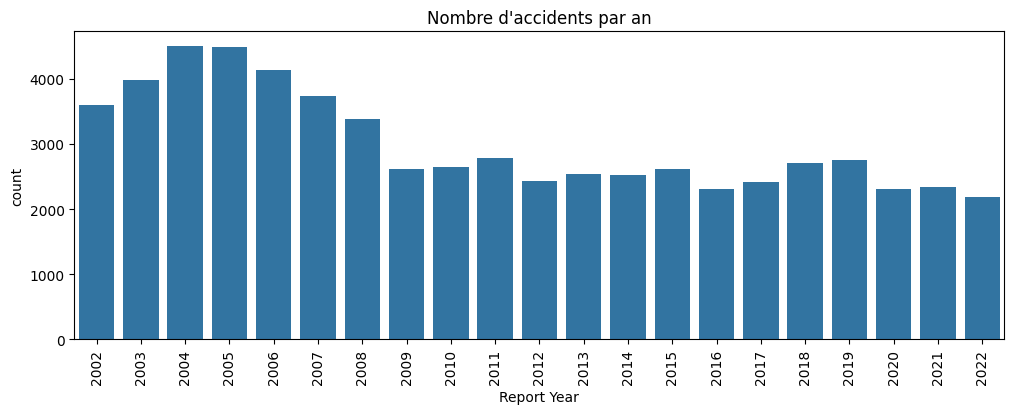

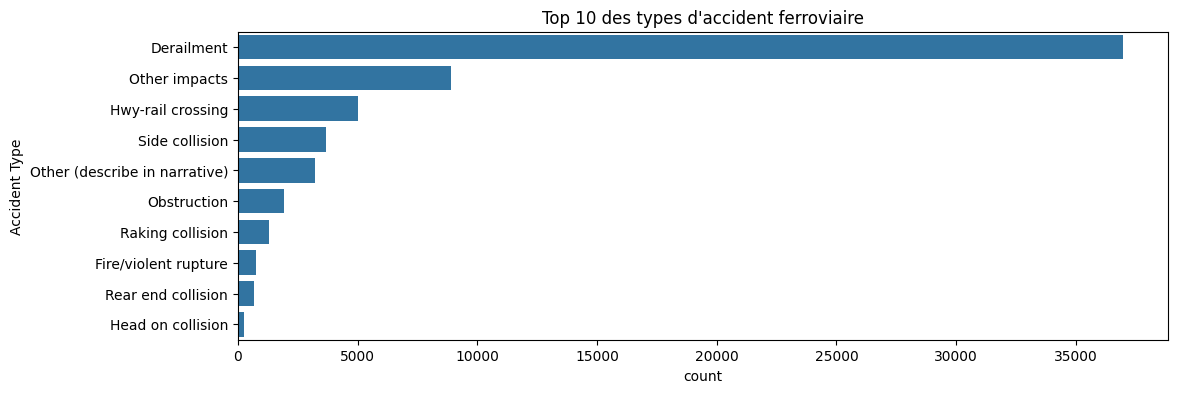

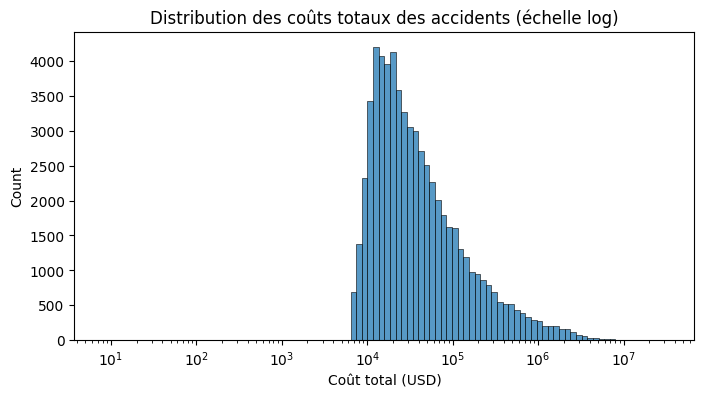

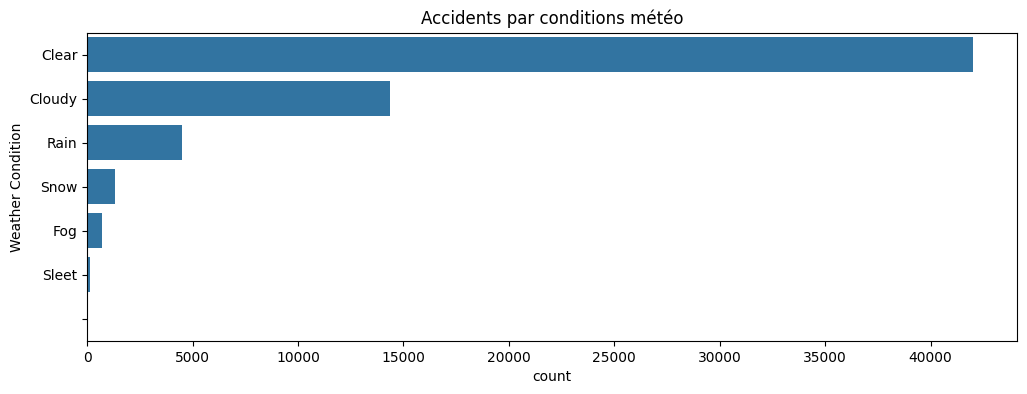

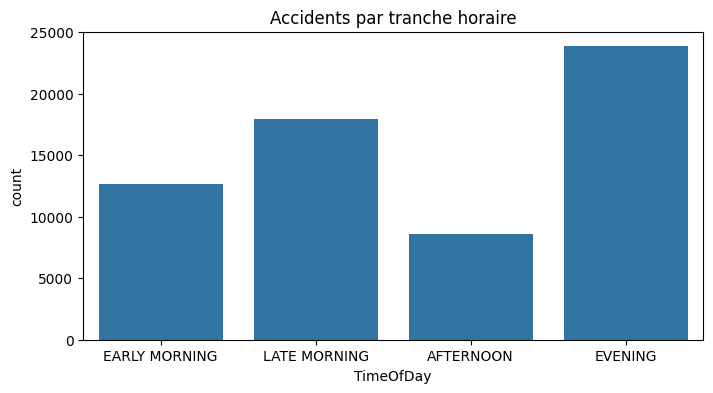

In [44]:
# 1. Distribution des accidents par année
plt.figure(figsize=(12,4))
sns.countplot(x="Report Year", data=df_risk, order=sorted(df_risk["Report Year"].unique()))
plt.title("Nombre d'accidents par an")
plt.xticks(rotation=90)
plt.show()

# 2. Top 10 types d'accident
plt.figure(figsize=(12,4))
order = df_risk["Accident Type"].value_counts().index[:10]
sns.countplot(y="Accident Type", data=df_risk, order=order)
plt.title("Top 10 des types d'accident ferroviaire")
plt.show()

# 3. Distribution des coûts (log-scale)
plt.figure(figsize=(8,4))
sns.histplot(df_risk["Total Damage Cost"], bins=100, log_scale=True)
plt.title("Distribution des coûts totaux des accidents (échelle log)")
plt.xlabel("Coût total (USD)")
plt.show()


# 4. Accidents par conditions météo
plt.figure(figsize=(12,4))
order = df_risk["Weather Condition"].value_counts().index[:8]
sns.countplot(y="Weather Condition", data=df_risk, order=order)
plt.title("Accidents par conditions météo")
plt.show()

# 5. Accidents par tranche horaire (TimeOfDay)
plt.figure(figsize=(8,4))
sns.countplot(x="TimeOfDay", data=df_risk, order=["EARLY MORNING","LATE MORNING","AFTERNOON","EVENING"])
plt.title("Accidents par tranche horaire")
plt.show()


,Total Persons Killed,Total Persons Injured
Report Year,,
2002,84,1044
2003,64,592
2004,93,824
2005,142,1741
2006,89,688
2007,114,887
2008,89,922
2009,55,445
2010,46,496


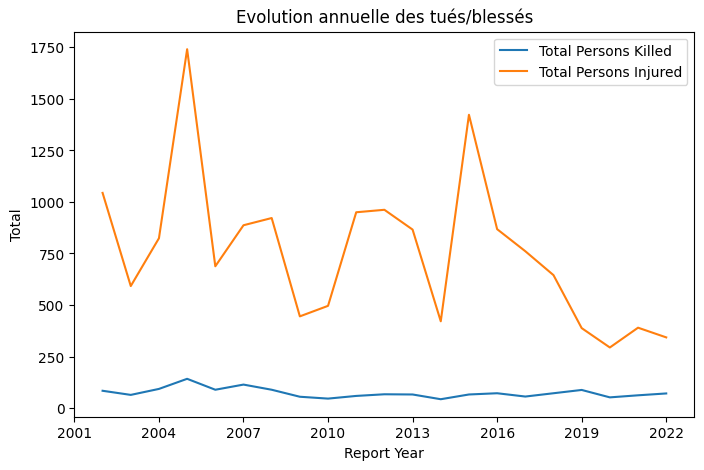

In [45]:
# Evolution annuelle du nombre de tués et blessés 
df_risk_valid = df_risk[df_risk["Report Year"] > 1900] 
df_risk_yearly = df_risk_valid.groupby("Report Year")[["Total Persons Killed", "Total Persons Injured"]].sum()
display(df_risk_yearly)

ax = df_risk_yearly.plot(
    title="Evolution annuelle des tués/blessés",
    figsize=(8,5)
)
ax.set_xlabel("Report Year")
ax.set_ylabel("Total")
ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))

years = df_risk_yearly.index
ax.set_xlim(years.min() - 1, years.max() + 1)

plt.show()

Total Persons Killed                      \
Weather Condition                                      Clear    Cloudy   
Accident Type                                                            
Broken train collision                         0.0  0.000000  0.000000   
Derailment                                     0.0  0.002354  0.000471   
Explosion-detonation                           0.0  0.000000  0.000000   
Fire/violent rupture                           0.0  0.000000  0.000000   
Head on collision                              0.0  0.497110  0.290323   
Hwy-rail crossing                              0.0  0.260093  0.171026   
Obstruction                                    0.0  0.036689  0.023310   
Other (describe in narrative)                  0.0  0.015357  0.001565   
Other impacts                                  0.0  0.002763  0.001840   
RR grade crossing                              0.0  0.000000  0.000000   
Raking collision                               0.0  0.000000  0.000000   
Rear end collision                             0.0  0.033937  0.065359   
Side collision                                 0.0  0.002851  0.008102   

                                                                       \
Weather Condition                   Fog      Rain     Sleet      Snow   
Accident Type                                                           
Broken train collision         0.000000  0.000000  0.000000  0.000000   
Derailment                     0.000000  0.002718  0.000000  0.001182   
Explosion-detonation           0.000000  0.000000  0.000000  0.000000   
Fire/violent rupture           0.000000  0.000000  0.000000  0.000000   
Head on collision              0.333333  0.000000  0.000000  0.000000   
Hwy-rail crossing              0.150685  0.172000  0.181818  0.125000   
Obstruction                    0.029412  0.153191  0.333333  0.100000   
Other (describe in narrative)  0.000000  0.000000  0.000000  0.000000   
Other impacts                  0.000000  0.000000  0.000000  0.000000   
RR grade crossing              0.000000  0.000000  0.000000  0.000000   
Raking collision               0.000000  0.000000  0.000000  0.000000   
Rear end collision             0.000000  0.000000  0.000000  0.000000   
Side collision                 0.000000  0.000000  0.000000  0.000000   

                              Total Persons Injured                      \
Weather Condition                                       Clear    Cloudy   
Accident Type                                                             
Broken train collision                          0.0  0.142857  0.000000   
Derailment                                      0.0  0.114741  0.066455   
Explosion-detonation                            0.0  0.285714  0.500000   
Fire/violent rupture                            0.0  0.101190  0.127854   
Head on collision                               0.0  4.028902  6.258065   
Hwy-rail crossing                               0.0  1.366932  0.917505   
Obstruction                                     0.0  0.602389  0.962704   
Other (describe in narrative)                   0.0  0.291328  0.026604   
Other impacts                                   0.0  0.105699  0.070837   
RR grade crossing                               0.0  1.000000  4.333333   
Raking collision                                0.0  0.101810  0.190972   
Rear end collision                              0.0  2.110860  0.496732   
Side collision                                  0.0  0.133605  0.170139   

                                                                       \
Weather Condition                   Fog      Rain     Sleet      Snow   
Accident Type                                                           
Broken train collision         0.000000  0.000000  0.000000  0.000000   
Derailment                     0.037838  0.184466  0.027778  0.026005   
Explosion-detonation           0.000000  0.000000  0.000000  0.000000   
Fire/violent rupture           0.0000

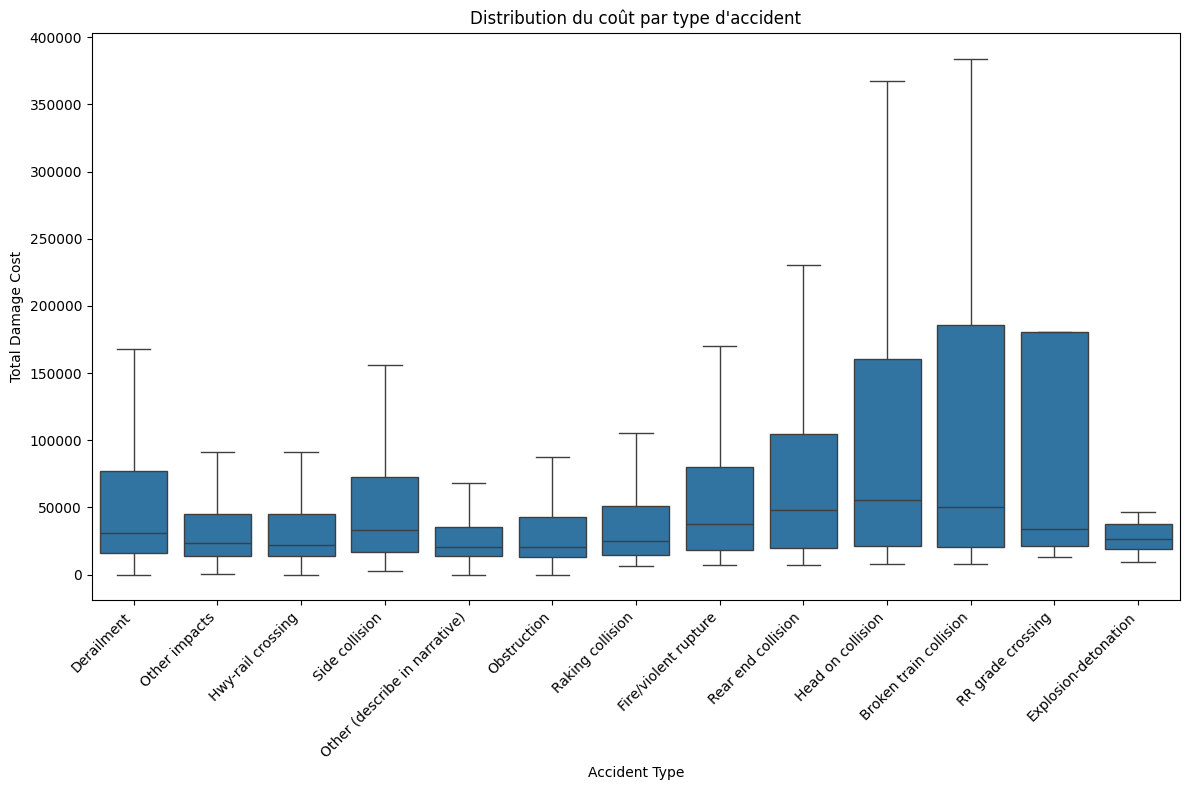

In [46]:
# Croisement entre type d’accident et conditions météo sur la gravité humaine
cross = df_risk.groupby(['Accident Type', 'Weather Condition'])[
    ['Total Persons Killed', 'Total Persons Injured', 'Total Damage Cost']
].mean().unstack().fillna(0)

display(cross)

# Visualisation boxplot des coûts par type d’accident

# Vérifier et filtrer les types d'accident avec assez de data
type_counts = df_risk["Accident Type"].value_counts()
types_valides = type_counts[type_counts > 10].index  # ou adapte le seuil si besoin

df_plot = df_risk[
    (df_risk["Accident Type"].isin(types_valides)) &
    (df_risk["Total Damage Cost"] > 0) &
    (df_risk["Total Damage Cost"] < 5e5)  # Filtre pour la lisibilité
].copy()

plt.figure(figsize=(12,8))
sns.boxplot(
    x="Accident Type",
    y="Total Damage Cost",
    data=df_plot,
    showfliers=False,
    order=types_valides  # Assure le bon ordre
)
plt.title("Distribution du coût par type d'accident")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [47]:
accident_counts = df_risk["Accident Type"].value_counts(normalize=True) * 100
print(accident_counts)

Accident Type
Derailment                       58.704588
Other impacts                    14.155570
Hwy-rail crossing                 8.000698
Side collision                    5.875538
Other (describe in narrative)     5.132763
Obstruction                       3.063152
Raking collision                  2.082308
Fire/violent rupture              1.233196
Rear end collision                1.072897
Head on collision                 0.428524
Broken train collision            0.199978
RR grade crossing                 0.025394
Explosion-detonation              0.025394
Name: proportion, dtype: float64


## Hypothèse sur le volume annuel de trajets de trains aux États-Unis

L’estimation du risque relatif de chaque type d’incident ferroviaire repose sur une fourchette réaliste du **nombre total de trajets de trains par an** aux États-Unis.

Selon l’**Association of American Railroads** ([AAR Data Center](https://www.aar.org/data-center/)),  
le volume annuel de circulations de trains (fret + passagers) n’est pas publié précisément, mais peut être **estimé** entre **10 millions et 20 millions de trajets de trains par an** pour la période récente (2002-2022).  
Cela couvre l’ensemble des compagnies de fret, de passagers interurbains (Amtrak), et de banlieue.

Pour chaque type d’accident, nous calculons donc les probabilités et taux de survenue :
- **Sur la base d’un total de 210 millions de trajets (10M/an x 21 ans)**
- **Et d’un total de 420 millions de trajets (20M/an x 21 ans)**

Cette approche permet d’encadrer l’incertitude liée à l’absence de donnée consolidée, tout en fournissant une analyse robuste et réaliste du risque ferroviaire à l’échelle nationale.

> _Les résultats (taux/probabilités) sont donc exprimés sous forme de fourchette, reflétant cette incertitude._

In [48]:
# Paramètres réalistes
min_trains_per_year = 10_000_000
max_trains_per_year = 20_000_000
n_years = 2022 - 2002 + 1

total_trains_min = min_trains_per_year * n_years
total_trains_max = max_trains_per_year * n_years

# Préparation summary complet par type d'accident
summary = df_risk_valid.groupby("Accident Type").agg(
    Incidents_recensés=("Accident Number", "count"),
    Coût_moyen_USD=("Total Damage Cost", "mean"),
    Total_tués=("Total Persons Killed", "sum"),
    Total_blessés=("Total Persons Injured", "sum")
)

summary["Proba_brute_basse_%"] = (summary["Incidents_recensés"] / total_trains_min * 100).round(8)
summary["Proba_brute_haute_%"] = (summary["Incidents_recensés"] / total_trains_max * 100).round(8)
summary["Tués_par_incident"] = (summary["Total_tués"] / summary["Incidents_recensés"]).round(3)
summary["Blessés_par_incident"] = (summary["Total_blessés"] / summary["Incidents_recensés"]).round(3)

# Incidents majeurs
major = df_risk_valid[df_risk_valid["Total Damage Cost"] > 1_000_000]["Accident Type"].value_counts()
summary["% incidents >1M$"] = ((major / summary["Incidents_recensés"]) * 100).round(2).fillna(0)

# Hazmat ou évacuation
hazmat = df_risk_valid[(df_risk_valid["Hazmat Cars Damaged"] > 0) | (df_risk_valid["Persons Evacuated"] > 0)]["Accident Type"].value_counts()
summary["% hazmat/evac"] = ((hazmat / summary["Incidents_recensés"]) * 100).round(2).fillna(0)

summary = summary.reset_index()

display(summary)


,Accident Type,Incidents_recensés,Coût_moyen_USD,Total_tués,Total_blessés,Proba_brute_basse_%,Proba_brute_haute_%,Tués_par_incident,Blessés_par_incident,% incidents >1M$,% hazmat/evac
0,Broken train collision,126,1.994674e+05,0,11,0.000060,0.000030,0.000,0.087,2.38,11.11
1,Derailment,36988,1.523368e+05,70,3904,0.017613,0.008807,0.002,0.106,3.05,11.69
2,Explosion-detonation,16,9.211781e+04,0,5,0.000008,0.000004,0.000,0.312,6.25,18.75
3,Fire/violent rupture,777,1.211496e+05,0,85,0.000370,0.000185,0.000,0.109,1.16,2.96
4,Head on collision,270,1.067036e+06,106,1129,0.000129,0.000064,0.393,4.181,18.15,7.78
5,Hwy-rail crossing,5041,8.687184e+04,1182,6129,0.002400,0.001200,0.234,1.216,1.55,2.42
6,Obstruction,1930,1.160335e+05,98,1433,0.000919,0.000460,0.051,0.742,1.81,2.23
7,Other (describe in narrative),3234,7.185967e+04,35,667,0.001540,0.000770,0.011,0.206,1.08,3.59
8,Other impacts,8919,4.979678e+04,20,829,0.004247,0.002124,0.002,0.093,0.22,11.16
9,RR grade crossing,16,1.723542e+06,0,23,0.000008,0.000004,0.000,1.438,37.50,6.25


# Analyse de la vulnérabilité 

In [49]:
# Fusion propre
df_risk = df_risk.merge(summary, how="left", on="Accident Type")

# Vérif rapide
print(df_risk.shape)
display(df_risk.head(3))

(63007, 53)


,Accident Number,Reporting Railroad Code,Reporting Railroad Name,Accident Year,Accident Month,Day,Date,Time,Report Year,Accident Type,State Abbreviation,State Name,County Name,Latitude,Longitude,Weather Condition,Temperature,Visibility,Train Speed,Total Damage Cost,Equipment Damage Cost,Track Damage Cost,Primary Accident Cause,Primary Accident Cause Code,Accident Cause,Accident Cause Code,Railroad Employees Killed,Railroad Employees Injured,Passengers Killed,Passengers Injured,Others Killed,Others Injured,Total Persons Killed,Total Persons Injured,Hazmat Cars,Hazmat Cars Damaged,Hazmat Released Cars,Persons Evacuated,Derailed Loaded Freight Cars,Derailed Empty Freight Cars,Derailed Loaded Passenger Cars,Derailed Empty Passenger Cars,TimeOfDay,Incidents_recensés,Coût_moyen_USD,Total_tués,Total_blessés,Proba_brute_basse_%,Proba_brute_haute_%,Tués_par_incident,Blessés_par_incident,% incidents >1M$,% hazmat/evac
0,N1700013,NICD,Northern Indiana Commuter Transportation District,17,6,6,06/06/2017,2:14 PM,2017,Derailment,IL,ILLINOIS,COOK,41.884035,-87.623003,Clear,65.0,Day,10.0,132013.0,98627.0,0.0,Switch point worn or broken,T314,Switch point worn or broken,T314,0,0,0,0,0,0,0,0,0,0,0,149,0,0,2,0,AFTERNOON,36988,152336.753839,70,3904,0.017613,0.008807,0.002,0.106,3.05,11.69
1,201707188,NIRC,NORTHEAST ILLINOIS REGIONAL COMMUTER RAIL CORP...,17,6,6,06/06/2017,2:14 PM,2017,Derailment,IL,ILLINOIS,COOK,41.884035,-87.623003,Clear,65.0,Day,0.0,132013.0,0.0,33386.0,Switch point worn or broken,T314,Switch point worn or broken,T314,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,AFTERNOON,36988,152336.753839,70,3904,0.017613,0.008807,0.002,0.106,3.05,11.69
2,543854,IC,Illinois Central Railroad Company,7,1,11,01/11/2007,7:10 AM,2007,Derailment,LA,LOUISIANA,ST JOHN THE BAPTIST,0.000000,0.000000,Cloudy,56.0,Day,4.0,9986.0,5220.0,4766.0,Switch damaged or out of adjustment,T311,Switch damaged or out of adjustment,T311,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,LATE MORNING,36988,152336.753839,70,3904,0.017613,0.008807,0.002,0.106,3.05,11.69


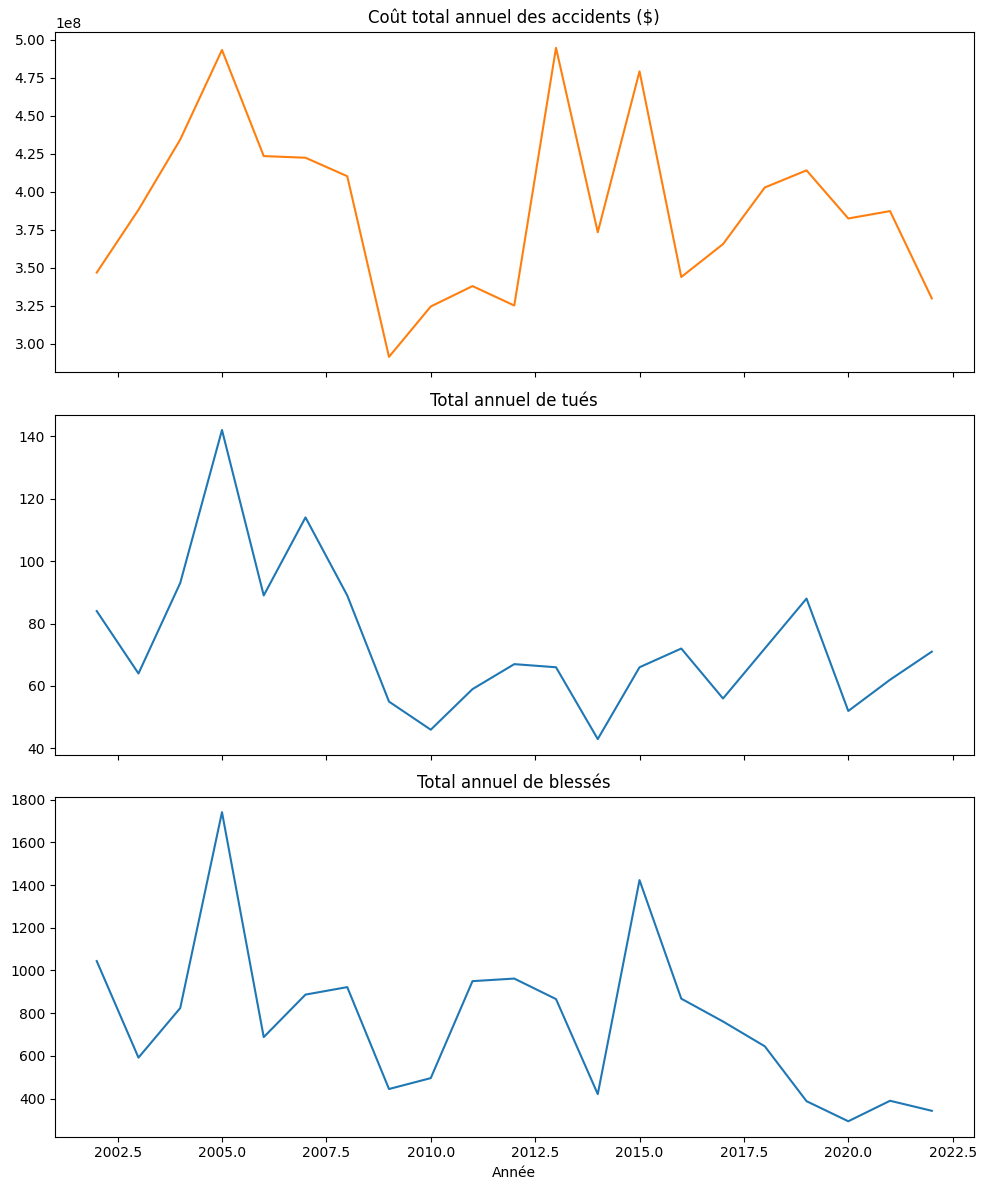

In [50]:
# Evolution coûts, tués, blessés
annual_costs = df_risk_valid.groupby("Report Year")["Total Damage Cost"].sum()
annual_deaths = df_risk_valid.groupby("Report Year")["Total Persons Killed"].sum()
annual_injuries = df_risk_valid.groupby("Report Year")["Total Persons Injured"].sum()

fig, axs = plt.subplots(3, 1, figsize=(10, 12), sharex=True)
annual_costs.plot(ax=axs[0], title="Coût total annuel des accidents ($)", color='tab:orange')
annual_deaths.plot(ax=axs[1], title="Total annuel de tués")
annual_injuries.plot(ax=axs[2], title="Total annuel de blessés")
axs[2].set_xlabel("Année")
plt.tight_layout()
plt.show()


Accident Type
RR grade crossing                1.723542e+06
Head on collision                1.067036e+06
Rear end collision               3.872845e+05
Broken train collision           1.994674e+05
Derailment                       1.523368e+05
Fire/violent rupture             1.211496e+05
Obstruction                      1.160335e+05
Side collision                   1.076103e+05
Explosion-detonation             9.211781e+04
Hwy-rail crossing                8.687184e+04
Raking collision                 7.737079e+04
Other (describe in narrative)    7.185967e+04
Other impacts                    4.979678e+04
Name: Coût_moyen_USD, dtype: float64

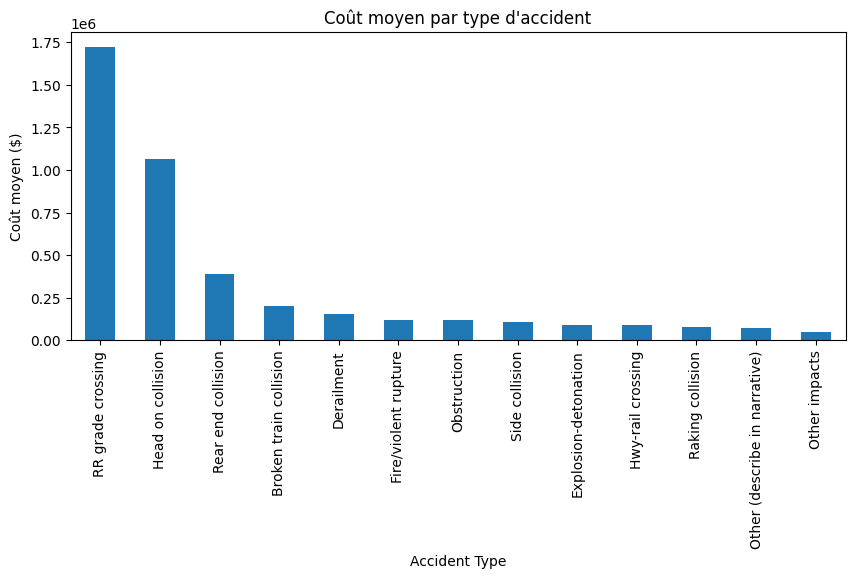

In [51]:
# Coût moyen par type
cost_by_type = summary.set_index("Accident Type")["Coût_moyen_USD"].sort_values(ascending=False)
display(cost_by_type)
cost_by_type.plot(kind="bar", title="Coût moyen par type d'accident", figsize=(10,4))
plt.ylabel("Coût moyen ($)")
plt.show()

In [52]:
# Ratio tués/blessés par incident
severity = summary[["Accident Type", "Tués_par_incident", "Blessés_par_incident"]].sort_values("Tués_par_incident", ascending=False)
display(severity)

,Accident Type,Tués_par_incident,Blessés_par_incident
4,Head on collision,0.393,4.181
5,Hwy-rail crossing,0.234,1.216
6,Obstruction,0.051,0.742
11,Rear end collision,0.037,1.599
7,Other (describe in narrative),0.011,0.206
12,Side collision,0.004,0.137
8,Other impacts,0.002,0.093
1,Derailment,0.002,0.106
0,Broken train collision,0.000,0.087
3,Fire/violent rupture,0.000,0.109


In [53]:
acc_types = df_risk_valid["Accident Type"].unique()
summary = pd.DataFrame({"Accident Type": acc_types}).set_index("Accident Type")

# Incidents
summary["Incidents_recensés"] = df_risk_valid["Accident Type"].value_counts()

# Fréquence = proba brute pour bornes min et max
summary["Frequence (%) (bas)"] = (summary["Incidents_recensés"] / total_trains_min * 100)
summary["Frequence (%) (haut)"] = (summary["Incidents_recensés"] / total_trains_max * 100)

# Conséquences brutes
summary["Coût_moyen_USD"] = df_risk_valid.groupby("Accident Type")["Total Damage Cost"].mean()
killed = df_risk_valid.groupby("Accident Type")["Total Persons Killed"].sum()
injured = df_risk_valid.groupby("Accident Type")["Total Persons Injured"].sum()
summary["Tués_par_incident"] = killed / summary["Incidents_recensés"]
summary["Blessés_par_incident"] = injured / summary["Incidents_recensés"]

# Normalisation de la conséquence seule
scaler = MinMaxScaler()
consequence_cols = ["Coût_moyen_USD", "Tués_par_incident", "Blessés_par_incident"]
summary[consequence_cols] = scaler.fit_transform(summary[consequence_cols].fillna(0))

# Conséquence agrégée 
summary["Consequence"] = (
    summary["Coût_moyen_USD"] * 0.5 +
    summary["Tués_par_incident"] * 0.3 +
    summary["Blessés_par_incident"] * 0.2
)

# Score final Risque = Frequence (bas) × Consequence
summary["Risque_composite"] = summary["Frequence (%) (bas)"] * summary["Consequence"]

# Criticité selon le score final
summary["Niveau_criticité"] = pd.qcut(
    summary["Risque_composite"],
    q=[0, 0.5, 0.75, 1],
    labels=["Low", "Medium", "High"]
)

# Reset index pour merge
summary = summary.reset_index()

# Merge complet
df_risk = df_risk.merge(
    summary[[
        "Accident Type",
        "Frequence (%) (bas)",
        "Frequence (%) (haut)",
        "Consequence",
        "Risque_composite",
        "Niveau_criticité"
    ]],
    on="Accident Type",
    how="left"
)

# Vérification
print(df_risk[[
    "Accident Type",
    "Frequence (%) (bas)",
    "Consequence",
    "Risque_composite",
    "Niveau_criticité"
]].head())

       Accident Type  Frequence (%) (bas)  Consequence  Risque_composite  \
0         Derailment             0.017613     0.032969          0.000581   
1         Derailment             0.017613     0.032969          0.000581   
2         Derailment             0.017613     0.032969          0.000581   
3  Hwy-rail crossing             0.002400     0.245380          0.000589   
4         Derailment             0.017613     0.032969          0.000581   

  Niveau_criticité  
0             High  
1             High  
2             High  
3             High  
4             High  


In [54]:
# Supprimer tous les doublons
df_risk = df_risk.drop(
    columns=[
        'Risque_composite_x', 'Niveau_criticité_x',
        'Risque_composite_y', 'Niveau_criticité_y'
    ],
    errors='ignore'
)

# Vérifie la liste finale des colonnes
print("\nColonnes finales:")
print(df_risk.columns.tolist())


Colonnes finales:
['Accident Number', 'Reporting Railroad Code', 'Reporting Railroad Name', 'Accident Year', 'Accident Month', 'Day', 'Date', 'Time', 'Report Year', 'Accident Type', 'State Abbreviation', 'State Name', 'County Name', 'Latitude', 'Longitude', 'Weather Condition', 'Temperature', 'Visibility', 'Train Speed', 'Total Damage Cost', 'Equipment Damage Cost', 'Track Damage Cost', 'Primary Accident Cause', 'Primary Accident Cause Code', 'Accident Cause', 'Accident Cause Code', 'Railroad Employees Killed', 'Railroad Employees Injured', 'Passengers Killed', 'Passengers Injured', 'Others Killed', 'Others Injured', 'Total Persons Killed', 'Total Persons Injured', 'Hazmat Cars', 'Hazmat Cars Damaged', 'Hazmat Released Cars', 'Persons Evacuated', 'Derailed Loaded Freight Cars', 'Derailed Empty Freight Cars', 'Derailed Loaded Passenger Cars', 'Derailed Empty Passenger Cars', 'TimeOfDay', 'Incidents_recensés', 'Coût_moyen_USD', 'Total_tués', 'Total_blessés', 'Proba_brute_basse_%', 'Prob

In [55]:
print(f"Shape du df_risk : {df_risk.shape}")

describe_all = df_risk.describe().transpose()

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

display(describe_all.T)


Shape du df_risk : (63007, 58)


,Accident Year,Accident Month,Day,Report Year,Latitude,Longitude,Temperature,Train Speed,Total Damage Cost,Equipment Damage Cost,Track Damage Cost,Railroad Employees Killed,Railroad Employees Injured,Passengers Killed,Passengers Injured,Others Killed,Others Injured,Total Persons Killed,Total Persons Injured,Hazmat Cars,Hazmat Cars Damaged,Hazmat Released Cars,Persons Evacuated,Derailed Loaded Freight Cars,Derailed Empty Freight Cars,Derailed Loaded Passenger Cars,Derailed Empty Passenger Cars,Incidents_recensés,Coût_moyen_USD,Total_tués,Total_blessés,Proba_brute_basse_%,Proba_brute_haute_%,Tués_par_incident,Blessés_par_incident,% incidents >1M$,% hazmat/evac,Frequence (%) (bas),Frequence (%) (haut),Consequence,Risque_composite
count,63007.000000,63007.000000,63007.000000,63007.000000,61278.000000,61294.000000,63007.000000,63007.000000,6.300700e+04,6.300700e+04,6.300700e+04,63007.000000,63007.000000,63007.000000,63007.000000,63007.000000,63007.000000,63007.00000,63007.000000,63007.000000,63007.000000,63007.000000,63007.000000,63007.000000,63007.000000,63007.000000,63007.000000,63007.000000,6.300700e+04,63007.000000,63007.000000,63007.000000,63007.000000,63007.000000,63007.000000,63007.000000,63007.000000,63007.000000,63007.000000,63007.000000,6.300700e+04
mean,10.753202,6.471884,15.601568,2010.753202,17.770645,-43.607099,58.771914,11.474725,1.296861e+05,6.833873e+04,3.303754e+04,0.001159,0.044344,0.001190,0.071071,0.015125,0.061390,0.02460,0.253146,2.696145,0.262193,0.015030,0.787563,1.822115,0.944752,0.010237,0.014252,23867.700144,1.296861e+05,144.835971,3028.071373,0.011366,0.005683,0.024622,0.253378,2.374155,9.891878,0.011366,0.005683,0.050765,3.971203e-04
std,6.103201,3.429206,8.739873,6.103201,19.190741,47.230892,21.883188,16.495177,5.207283e+05,3.249288e+05,1.455736e+05,0.041577,0.346121,0.114284,2.101682,0.150684,4.514401,0.26002,3.955704,9.413648,1.328479,0.302535,19.485660,4.088385,2.733577,0.231149,0.176069,15756.896479,8.214335e+04,306.855490,1732.129657,0.007503,0.003752,0.067387,0.430558,1.822565,3.385882,0.007503,0.003752,0.080541,2.616790e-04
min,2.000000,1.000000,1.000000,2002.000000,0.000000,-683.192190,-42.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,16.000000,4.979678e+04,0.000000,5.000000,0.000008,0.000004,0.000000,0.087000,0.220000,2.230000,0.000008,0.000004,0.001989,1.801411e-07
25%,5.000000,3.000000,8.000000,2005.000000,0.000000,-90.149187,42.000000,3.000000,1.560000e+04,4.400000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5041.000000,8.687184e+04,35.000000,829.000000,0.002400,0.001200,0.002000,0.106000,1.220000,11.110000,0.002400,0.001200,0.022599,3.983916e-05
50%,10.000000,7.000000,16.000000,2010.000000,0.000000,0.000000,60.000000,5.000000,2.983700e+04,1.380000e+04,1.445000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,36988.000000,1.523368e+05,70.000000,3904.000000,0.017613,0.008807,0.002000,0.106000,3.050000,11.690000,0.017613,0.008807,0.032969,5.807007e-04
75%,16.000000,9.000000,23.000000,2016.000000,38.363442,0.000000,75.000000,10.000000,7.600000e+04,3.510000e+04,1.589750e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,0.000000,0.000000,36988.000000,1.523368e+05,70.000000,3904.000000,0.017613,0.008807,0.002000,0.111000,3.050000,11.690000,0.017613,0.008807,0.032969,5.807007e-04
max,22.000000,12.000000,31.000000,2022.000000,90.135623,0.000000,118.000000,150.000000,3.153875e+07,2.714000e+07,8.711005e+06,2.000000,25.000000,24.000000,236.000000,8.000000,999.000000,25.00000,385.000000,169.000000,94.000000,32.000000,999.000000,113.000000,96.000000,21.000000,9.0000

In [56]:
# Définir les colonnes vraiment utiles
colonnes_utiles = [
    "Accident Number",
    "Accident Year", "Accident Month", "Day", "Report Year",
    "Accident Type", "State Abbreviation", "State Name", "County Name",
    "Latitude", "Longitude",
    "Weather Condition", "Visibility", "TimeOfDay",
    "Total Damage Cost", "Total Persons Killed", "Total Persons Injured",
    "Hazmat Cars", "Hazmat Cars Damaged", "Persons Evacuated",
    "Frequence (%) (bas)", "Frequence (%) (haut)",
    "Consequence", "Risque_composite", "Niveau_criticité"
]

# Extraire uniquement ces colonnes
df_final = df_risk[colonnes_utiles].copy()

# Export
df_final.to_csv("../data/cleaned/railroad_accident_cleaned.csv", index=False)
print("Fichier enregistré : /data/cleaned/railroad_accident_cleaned.csv")

Fichier enregistré : /data/cleaned/railroad_accident_cleaned.csv


Synthèse de l’exploration et structuration du module Risque Ferroviaire
L’analyse exploratoire menée a permis de :

Filtrer et nettoyer un jeu de données d’incidents ferroviaires pour isoler un sous-ensemble pertinent pour l’étude du risque logistique : variables structurantes, coûts, causes, conditions météo et indicateurs humains ont été conservés.

Normaliser et convertir les colonnes clés pour garantir leur exploitabilité : traitements des valeurs manquantes, conversions en formats numériques cohérents, création de variables dérivées comme la tranche horaire (TimeOfDay).

Analyser la distribution des accidents : fréquence par année, type, météo, tranche horaire ; répartition des coûts et impacts humains ; typologies d’incidents majeurs et impliquant des matières dangereuses.

Estimer la probabilité d’occurrence de chaque type d’accident sur une période récente (2002–2022) en se basant sur une fourchette réaliste de trajets de trains par an.

Calculer une conséquence normalisée par type d’accident en combinant coût moyen, tués et blessés par incident.

Déterminer un indicateur de risque combiné comme produit de la fréquence et de la conséquence, et en déduire un niveau de criticité (Faible, Modéré, Élevé).

Enrichir le jeu de données final avec ces métriques synthétiques pour chaque ligne d’incident, en plus d’indicateurs globaux sur les proportions d’incidents majeurs et de cas impliquant matières dangereuses ou évacuation.

Cette structuration garantit un module de risque ferroviaire directement réutilisable pour une analyse de la résilience de la chaîne logistique.

